In [ ]:
import sys
import os
import cv2
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..','src')))

from config import Config
from data_loader import DataLoader, ImagePreprocessing

from utils import Utils
from experiment import Reporting, Experiment

In [ ]:
# Get list of directories (classes)
config = Config('../src/config.json')
base_dir = config.get('data_path')
classes = os.listdir(base_dir)

# See classes in the dataset
print('Classes in the dataset:', classes)

In [ ]:
dataLoader = DataLoader(base_dir, 44)

df = dataLoader.create_dataframe(classes)

print(df.head())
print(df.tail())

In [ ]:
Utils.get_image_sizes_per_directory(df, base_dir)

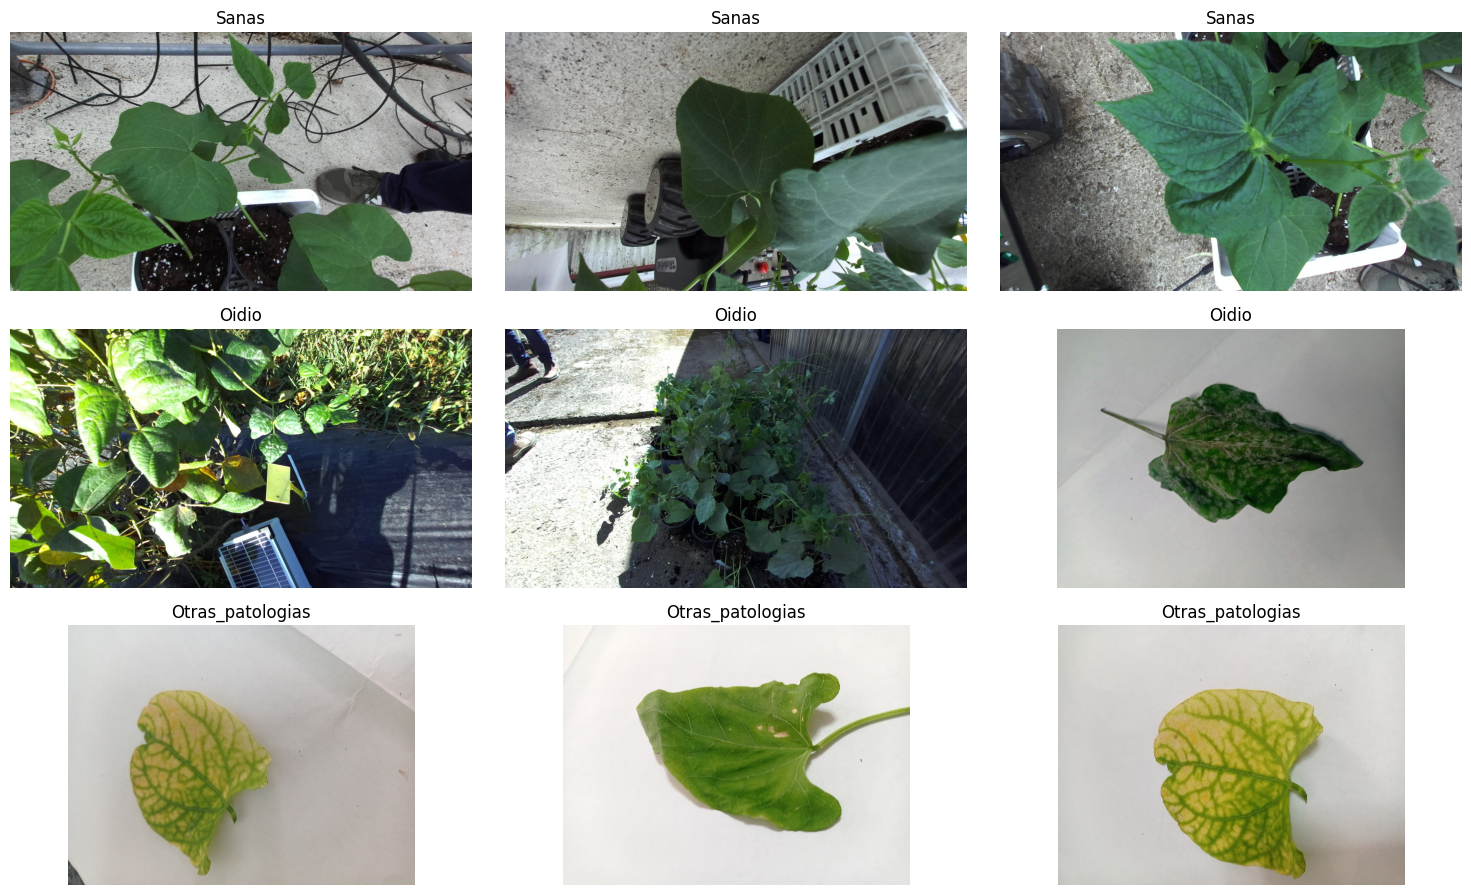

In [28]:
# Call the function with the DataFrame
Utils.display_dataset_images(df, base_dir, num_images_per_class=3)

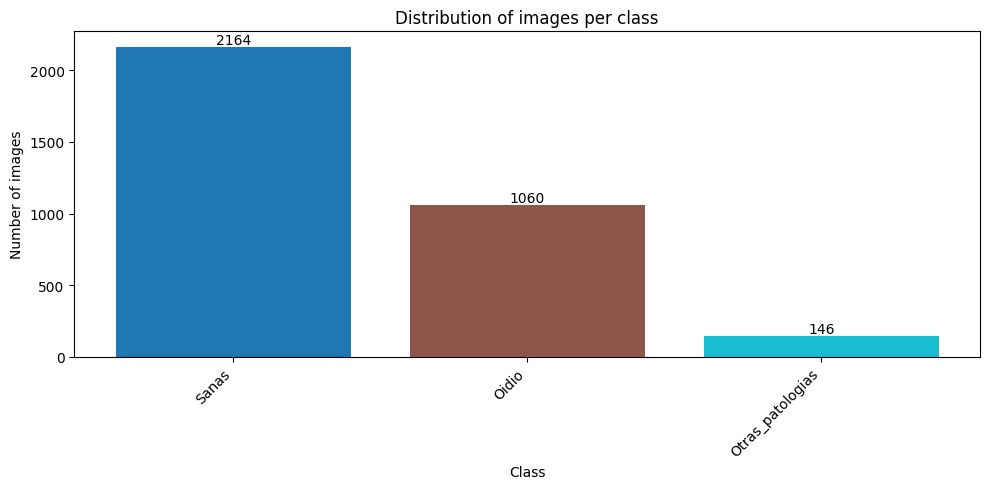

In [29]:
Utils.plot_image_distribution(df)

In [30]:
def visualize_preprocessing(image_paths, num_images):
    """
    Visualize the images before and after preprocessing.

    This function loads a specified number of images, applies color segmentation
    and contour segmentation to each, and displays the original image, the 
    color-segmented image, and the contour-segmented image side by side.

    Parameters:
    - image_paths (list): List of paths to the images to be processed.
    - num_images (int): The number of images to display.

    Returns:
    - None
    """
    n_rows = num_images
    fig, axes = plt.subplots(n_rows, 3, figsize=(10, 2 * n_rows))
    
    # Set column titles
    column_titles = ['Original Image', 'Color-Segmented Image', 'Contour-Segmented Image']
    for ax, col_title in zip(axes[0], column_titles):
        ax.set_title(col_title, fontsize=16)
    
    for idx, image_path in enumerate(image_paths[:num_images]):
        # Load the original image
        original_image = cv2.imread(image_path)
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Color segmented image
        color_segmented_image = ImagePreprocessing.segment_image_by_color(original_image_rgb)

        # Contour segmented image
        contour_segmented_image = ImagePreprocessing.segment_image_by_contour(original_image_rgb)

        # Display original image
        axes[idx, 0].imshow(original_image_rgb)
        axes[idx, 0].axis('off')

        # Display color-segmented image
        axes[idx, 1].imshow(color_segmented_image)
        axes[idx, 1].axis('off')

        # Display contour-segmented image
        axes[idx, 2].imshow(contour_segmented_image)
        axes[idx, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

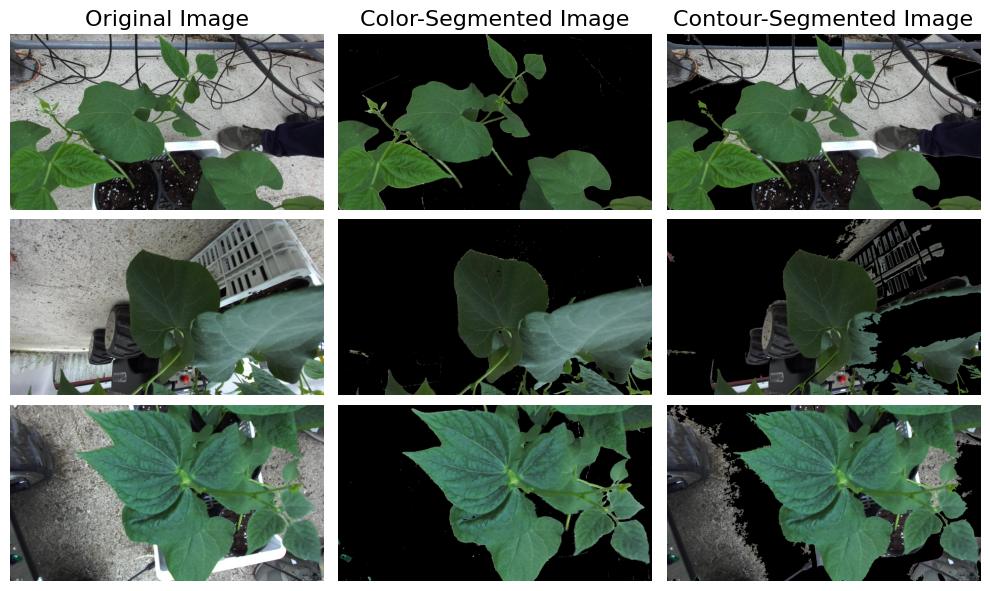

In [31]:
# Visualize preprocessing
image_paths = [os.path.join(base_dir, path) for path in df.head()['path']]
visualize_preprocessing(image_paths, num_images=3)

In [32]:
experiment = Experiment('../src/config.json')
all_results = experiment.run_experiment()

148/148 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.7335 - loss: 0.6739 - val_accuracy: 0.8594 - val_loss: 0.4418
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8469 - loss: 0.4122 - val_accuracy: 0.8851 - val_loss: 0.2819
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8520 - loss: 0.3759 - val_accuracy: 0.8634 - val_loss: 0.4322
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8447 - loss: 0.3985 - val_accuracy: 0.8950 - val_loss: 0.2456
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8618 - loss: 0.3193 - val_accuracy: 0.8950 - val_loss: 0.2420
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9117 - loss: 0.2532 - val_accuracy: 0.8772 - val_loss: 0.2777
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9006 - loss: 0.2534 - val_accuracy: 0.8970 - val_loss: 0.2347
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9042 - loss: 0.2473 - val_accuracy

Model: DenseNet201, Segmentation: None, Distribution: 0.7/0.15


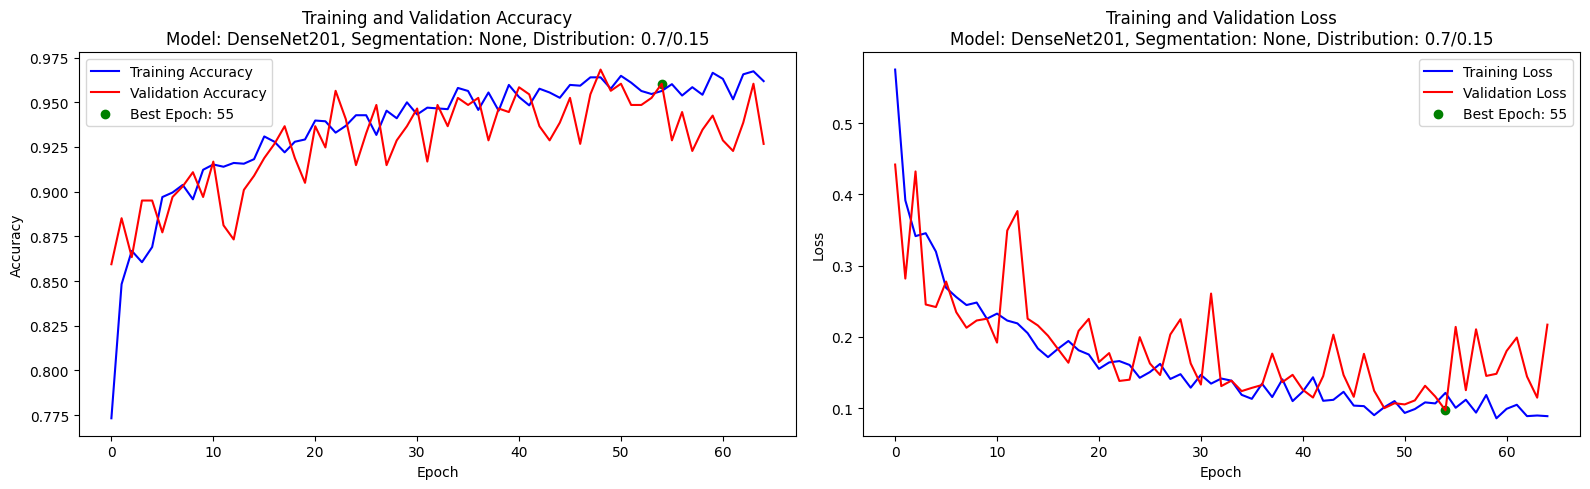

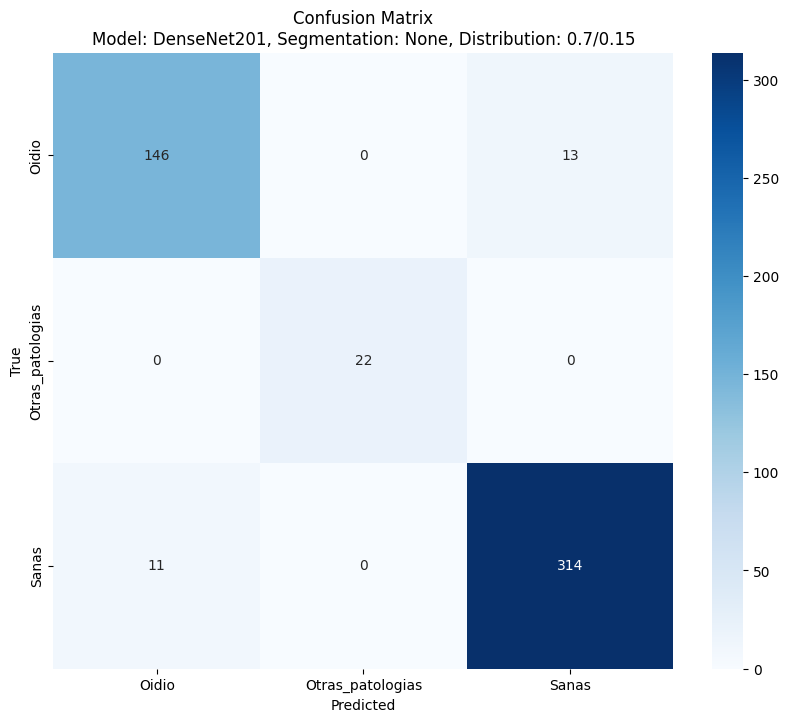

Classification Report
Model: DenseNet201, Segmentation: None, Distribution: 0.7/0.15
                  precision    recall  f1-score   support

           Oidio       0.93      0.92      0.92       159
Otras_patologias       1.00      1.00      1.00        22
           Sanas       0.96      0.97      0.96       325

        accuracy                           0.95       506
       macro avg       0.96      0.96      0.96       506
    weighted avg       0.95      0.95      0.95       506



In [33]:
reporting = Reporting()
reporting.plot_confusion_matrix_and_classification_report(all_results)

In [34]:
experiment.save_model(all_results, 'DenseNet201', None, '0.7/0.15', '../model')

Model saved at ../model/saved_model.keras
